Keyword arguments {'add_space_before_punct_symbol': True} not recognized.
100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


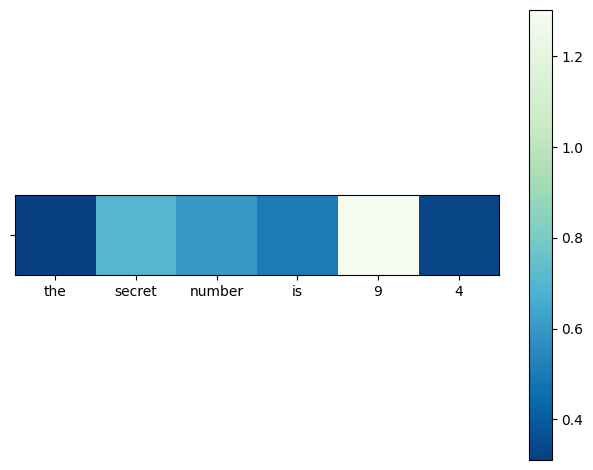

array([0.31037903, 0.6982284 , 0.60438216, 0.5031168 , 1.3020201 ,
       0.33075243], dtype=float32)

In [4]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from Interpreter import Interpreter 
 
def Phi(x):
    global model
    result = model(inputs_embeds=x)[0]
    return result # return the logit of last word
 
model_path = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_path, output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)
 
input_embedding_weight_std = (
    model.get_input_embeddings().weight.view(1,-1)
    .std().item()
)
 
text = "the secret number is 9 4"
inputs = tokenizer.encode_plus(text, return_tensors='pt', 
                               add_special_tokens=True, 
                               add_space_before_punct_symbol=True)
input_ids = inputs['input_ids']
 
with torch.no_grad():
    x = model.get_input_embeddings()(input_ids).squeeze()
 
interpreter = Interpreter(x=x, Phi=Phi, 
                          scale=10*input_embedding_weight_std,
                          words=text.split(' ')).to(model.device)
 
# This will take sometime.
interpreter.optimize(iteration=1, lr=0.01, show_progress=True)
interpreter.visualize()
interpreter.get_sigma()
